# Use the Computer Vision client library

## Create the computer vision service

In [1]:
!az cognitiveservices account list-kinds

^C


In [ ]:
!az cognitiveservices account create \
    --name demo-ComputerVision \
    --resource-group Evonik \
    --kind ComputerVision \
    --sku F0 \
    --location eastus \
    --yes

## Install the client library

In [5]:
!pip install --upgrade azure-cognitiveservices-vision-computervision
!pip install pillow
!pip install scikit-image

  Using cached azure_cognitiveservices_vision_computervision-0.7.0-py2.py3-none-any.whl (35 kB)
  Using cached Pillow-8.1.0-cp36-cp36m-win_amd64.whl (2.1 MB)


## Create a new Python application

In [10]:
subscription_key = "6bd22246c19a45969cec05e965d4e8d7"
endpoint = "https://evonikcvservice.cognitiveservices.azure.com/"

In [11]:
from azure.cognitiveservices.vision.computervision  import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

## Analyze an image

In [12]:
remote_image_url = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg"

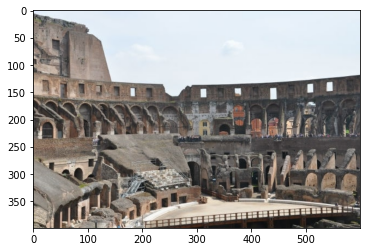

In [13]:
from skimage import io
import matplotlib.pyplot as plt

image = io.imread(remote_image_url)
plt.imshow(image)
plt.show()

## Get image description

In [14]:
'''
Describe an Image - remote
This example describes the contents of an image with the confidence score.
'''
print("===== Describe an image - remote =====")
# Call API
description_results = computervision_client.describe_image(remote_image_url )

# Get the captions (descriptions) from the response, with confidence level
print("Description of remote image: ")
if (len(description_results.captions) == 0):
    print("No description detected.")
else:
    for caption in description_results.captions:
        print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))

===== Describe an image - remote =====
Description of remote image: 
'a large stone structure with many arches with Colosseum in the background' with confidence 26.39%


******

In [19]:
description_results